# K-Means Clustering Application - Sami-ul Ahmed

In [1]:
!python -m pip install -U scikit-learn pandas seaborn numpy matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_df[['sepal length (cm)', 'sepal width (cm)']]) # fit the model to the data
# the model was only fit to 2 features, but we can still predict on all 4. We only used 2 because the other 2 are
# redundant (they are highly correlated to the other 2)

iris_df['cluster'] = kmeans.labels_ # add cluster labels to the dataframe

print(iris_df.head())

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


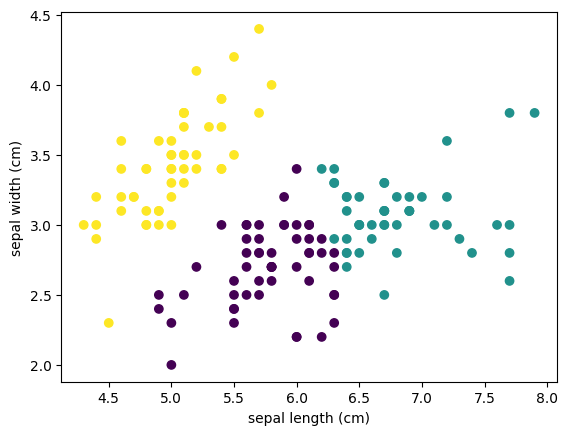

In [4]:
import matplotlib.pyplot as plt

plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['cluster'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [6]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(iris_df[['sepal length (cm)', 'sepal width (cm)']], kmeans.labels_) # iris_df[['sepal length (cm)', 'sepal width (cm)']] is the data, kmeans.labels_ is the labels
print(f"Silhouette score: {silhouette_avg}") # evaluate the model using the silhouette score (-1 to 1, higher is better)


Silhouette score: 0.4450525692083639


c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

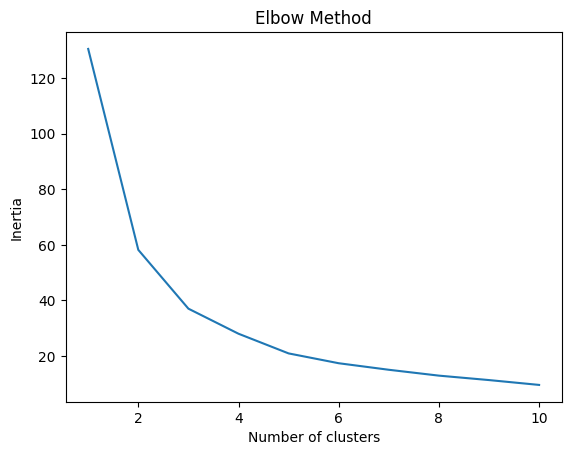

In [8]:
# Evaluate the model using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df[['sepal length (cm)', 'sepal width (cm)']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() # the elbow is at 3, so we can conclude that 3 is the optimal number of clusters